<a href="https://colab.research.google.com/github/Vagarh/University-specialization-in-analytics-and-big-data-IU-DIGITAL/blob/main/Clasificacion_de_frutas_con_tensorflow/keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# F40 - Evidencia de Aprendizaje 3. Taller: Aplicando el aprendizaje profundo

## Resumen
El código generado es para un modelo de clasificación de frutas usando TensorFlow y Keras. Primero, carga un conjunto de datos de imágenes de frutas, y luego preprocesa y normaliza las imágenes. A continuación, entrena un modelo de red neuronal convolucional (CNN) en el conjunto de datos. Finalmente, evalúa el rendimiento del modelo en un conjunto de datos de validación.

Aquí hay un resumen más detallado del código:

* Importar bibliotecas: El código importa las bibliotecas necesarias, incluidas TensorFlow, Keras e ImageDataGenerator.
* Definir directorios: El código define los directorios que contienen las * imágenes de frutas frescas y estropeadas.
* Visualización de imágenes: El código define una función visualizing_images() para visualizar las imágenes de cada directorio.
* Distribución de ancho y altura de la imagen: El código traza la distribución de los anchos y alturas de las imágenes para verificar la consistencia.
* Contador de imágenes por directorio: El código cuenta el número de imágenes en cada directorio para verificar el equilibrio.
* Generador de datos de imágenes: El código crea un objeto ImageDataGenerator para preprocesar y normalizar las imágenes.
* Generadores de entrenamiento y validación: El código crea generadores de entrenamiento y validación para cargar las imágenes de los respectivos directorios.
* Arquitectura del modelo: El código define la arquitectura del modelo CNN usando la API Sequential de Keras.
* Compilación del modelo: El código compila el modelo usando el optimizador Adam, la pérdida de entropia cruzada categórica y métricas personalizadas (precisión, F1-puntuación, recuerdo).
* Entrenamiento del modelo: El código entrena el modelo durante 10 épocas usando el generador de entrenamiento y lo evalúa en el generador de validación.
* Evaluación del modelo: El código evalúa el rendimiento del modelo en el conjunto de datos de validación e imprime los resultados.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import os
import glob
import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

In [ ]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/FRUIT-16K'):
    print(dirname)
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
#directories
fresh_F_banana_dir = r"/content/drive/MyDrive/FRUIT-16K/F_Banana"
fresh_F_lemon_dir = r"/content/drive/MyDrive/FRUIT-16K/F_Lemon"
fresh_F_lulo_dir = r"/content/drive/MyDrive/FRUIT-16K/F_Lulo"
fresh_F_Mango_dir = r"/content/drive/MyDrive/FRUIT-16K/F_Mango"
fresh_F_orange_dir = r"/content/drive/MyDrive/FRUIT-16K/F_Orange"
fresh_F_strawberry_dir = r"/content/drive/MyDrive/FRUIT-16K/F_Strawberry"
stale_F_Tamarillo_dir = r"/content/drive/MyDrive/FRUIT-16K/F_Tamarillo"
stale_F_Tomato_dir = r"/content/drive/MyDrive/FRUIT-16K/F_Tomato"
stale_S_banana_dir = r"/content/drive/MyDrive/FRUIT-16K/S_Banana"
stale_S_Lemon_dir = r"/content/drive/MyDrive/FRUIT-16K/S_Lemon"
stale_S_Lulo_dir = r"/content/drive/MyDrive/FRUIT-16K/S_Lulo"
stale_S_Mango_dir = r"/content/drive/MyDrive/FRUIT-16K/S_Mango"
stale_S_orange_dir = r"/content/drive/MyDrive/FRUIT-16K/S_Orange"
stale_S_strawberry_dir = r"/content/drive/MyDrive/FRUIT-16K/S_Strawberry"
stale_S_Tamarillo_dir = r"/content/drive/MyDrive/FRUIT-16K/S_Tamarillo"
stale_S_Tomato_dir = r"/content/drive/MyDrive/FRUIT-16K/S_Tomato"

In [ ]:


def visualizing_images(path):
    # Listar los primeros 10 archivos de imagen en el directorio
    image_files = os.listdir(path)[:10]

    # Verificar si no hay imágenes en el directorio
    if not image_files:
        print("No se encontraron imágenes en el directorio especificado.")
        return

    # Crear una cuadrícula de subtramas para mostrar las imágenes
    num_images = len(image_files)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i, item in enumerate(image_files):
        img = plt.imread(os.path.join(path, item))
        axes[i].imshow(img)
        axes[i].set_title(f'Imagen {i+1}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Previzualización de las imagenes para cada clase

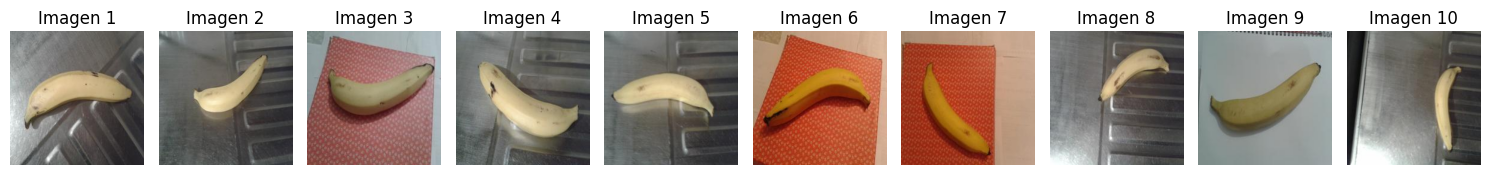

In [ ]:
visualizing_images(fresh_F_banana_dir)

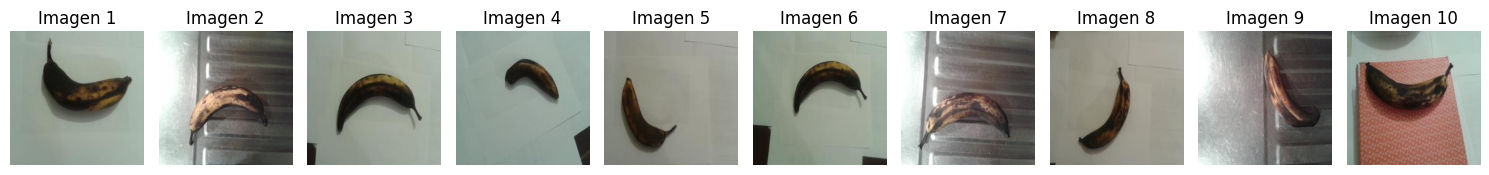

In [ ]:
visualizing_images(stale_S_banana_dir)

# Revisando imagenes y su distribucion

In [ ]:
root_directory = r"/content/drive/MyDrive/FRUIT-16K"

In [ ]:
widths = []
heights = []

# Iterating through all folders and their images
for folder in os.listdir(root_directory):
    folder_path = os.path.join(root_directory, folder)

    # Checking if the item in the directory is a folder
    if os.path.isdir(folder_path):
        for image_file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_file)

            # Checking if the item is a file with a common image extension (e.g., .jpg, .png)
            if os.path.isfile(image_path) and image_file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
                # Read the image using OpenCV
                image = cv2.imread(image_path)

                # Getting the image dimensions (width and height)
                img_height, img_width, _ = image.shape

                # Appending the dimensions to the respective lists
                widths.append(img_width)
                heights.append(img_height)

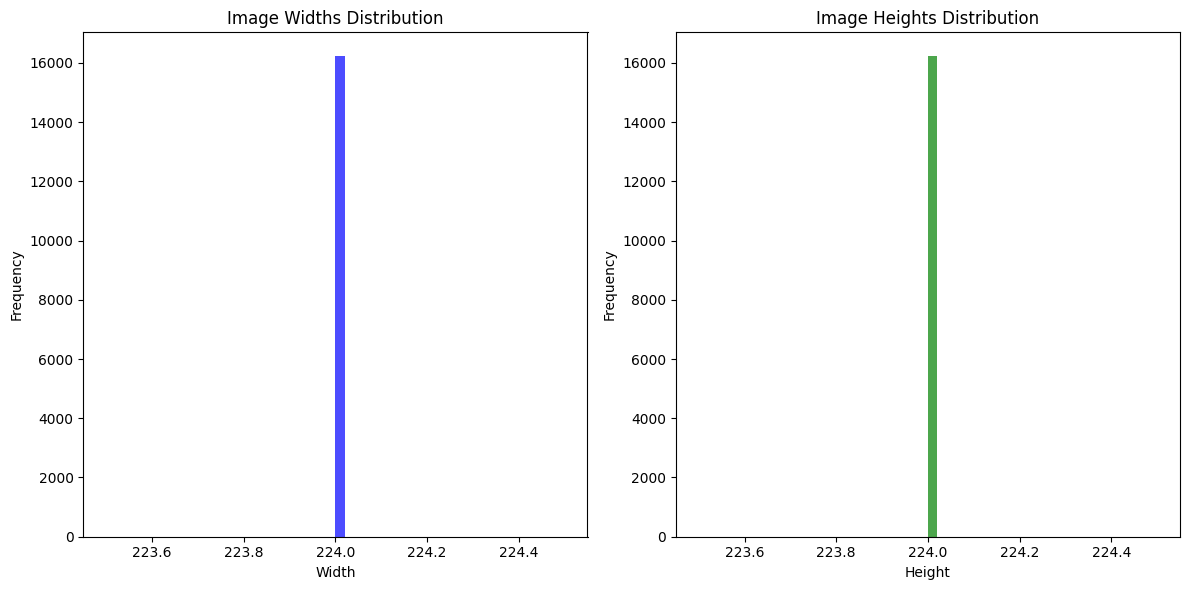

In [ ]:
# Plotting histograms of image widths and heights
plt.figure(figsize=(12, 6))

# Plotting image widths distribution
plt.subplot(1, 2, 1)
plt.hist(widths, bins=50, color='blue', alpha=0.7)
plt.title('Image Widths Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')

# Plotting image heights distribution
plt.subplot(1, 2, 2)
plt.hist(heights, bins=50, color='green', alpha=0.7)
plt.title('Image Heights Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Conteo de las Imagenes por Carpetas

In [ ]:
folder_image_counts = {}

# Iterating through subfolders
for folder in os.listdir(root_directory):
    folder_path = os.path.join(root_directory, folder)

    # Checking if the item in the directory is a folder
    if os.path.isdir(folder_path):
        # Use glob to count the number of image files in the folder
        image_files = glob.glob(os.path.join(folder_path, '*.jpg')) + \
                      glob.glob(os.path.join(folder_path, '*.jpeg')) + \
                      glob.glob(os.path.join(folder_path, '*.png'))

        # Counting the images in the folder
        image_count = len(image_files)

        # Adding the image count to the dictionary with the folder name as the key
        folder_image_counts[folder] = image_count

In [ ]:
# Printing the counts for each folder
for folder, count in folder_image_counts.items():
    print(f'Folder: {folder}, Image Count: {count}')

Folder: S_Mango, Image Count: 1000
Folder: S_Lulo, Image Count: 1010
Folder: F_Lemon, Image Count: 1000
Folder: S_Lemon, Image Count: 1000
Folder: S_Tamarillo, Image Count: 1040
Folder: S_Orange, Image Count: 1000
Folder: S_Strawberry, Image Count: 1000
Folder: S_Banana, Image Count: 1000
Folder: F_Lulo, Image Count: 1065
Folder: S_Tomato, Image Count: 1000
Folder: F_Tamarillo, Image Count: 1094
Folder: F_Orange, Image Count: 1000
Folder: F_Mango, Image Count: 1010
Folder: F_Tomato, Image Count: 1000
Folder: F_Strawberry, Image Count: 1000
Folder: F_Banana, Image Count: 1000


# Observacion

La distribución desigual de imágenes que se observa en el conjunto de datos por clase puede tener varios impactos significativos en el entrenamiento del modelo de clasificación en TensorFlow:

Sesgo en el entrenamiento:

Sobre-representación y subrepresentación: Las clases con más imágenes pueden influir más en el entrenamiento, mientras que las clases con menos imágenes pueden ser menos consideradas, lo que lleva a un sesgo en el modelo hacia las clases más representadas.

Rendimiento del modelo:
Menor precisión en clases menos representadas: El modelo puede tener dificultades para generalizar correctamente a clases con menos ejemplos, lo que resulta en una precisión más baja para estas clases.
Mejor rendimiento en clases más representadas: Puede haber una mejor precisión en clases con más ejemplos debido a su influencia dominante durante el entrenamiento.

Sobreajuste y generalización deficiente:

Sobreajuste en clases sobre-representadas: El modelo puede sobreajustarse a las clases con más ejemplos, lo que puede afectar negativamente su capacidad para generalizar a datos nuevos o a clases menos representadas.

# Carga de las Imagenes, Preprocesamiento y Normalización

In [ ]:
# specifying the image dimensions and batch size
img_height, img_width = 512,512
batch_size = 16

datagen = ImageDataGenerator(
    rescale=1.0/255.0,          # Normalizing pixel values to [0, 1]
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split = 0.2,

)

train_generator = datagen.flow_from_directory(
    directory = root_directory,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset = 'training',
    shuffle = True
)

validation_generator = datagen.flow_from_directory(
    directory = root_directory,
   target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle = False
)

Found 12976 images belonging to 16 classes.
Found 3243 images belonging to 16 classes.


# Arquitectura y compilación del modelo de redes neuronales

In [ ]:
model = keras.Sequential([
    # Capas convolucionales
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Capa de flatten
    layers.Flatten(),

    # Capas densas
    layers.Dense(128, activation='relu'),
    layers.Dense(16, activation='softmax')
])


In [ ]:
def f1_score(y_true, y_pred):
    # Convert predictions to binary values (0 or 1)
    y_pred = tf.round(y_pred)

    # Calculate true positives, false positives, and false negatives
    TP = tf.reduce_sum(y_true * y_pred)
    FP = tf.reduce_sum((1 - y_true) * y_pred)
    FN = tf.reduce_sum(y_true * (1 - y_pred))

    # Calculate precision and recall
    precision = TP / (TP + FP + tf.keras.backend.epsilon())
    recall = TP / (TP + FN + tf.keras.backend.epsilon())

    # Calculate F1 Score
    f1 = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())

    return f1

def recall(y_true, y_pred):
    # Convert predictions to binary values (0 or 1)
    y_pred = tf.round(y_pred)

    # Calculate true positives and false negatives
    TP = tf.reduce_sum(y_true * y_pred)
    FN = tf.reduce_sum(y_true * (1 - y_pred))

    # Calculate recall
    recall = TP / (TP + FN + tf.keras.backend.epsilon())

    return recall

In [ ]:

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy',f1_score, recall]
)

In [ ]:
epochs = 10
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data = validation_generator
)

Epoch 1/10
811/811 [==============================] - 1171s 1s/step - loss: 1.5092 - accuracy: 0.4990 - f1_score: 0.4300 - recall: 0.3371 - val_loss: 1.3901 - val_accuracy: 0.5729 - val_f1_score: 0.5384 - val_recall: 0.4748
Epoch 2/10
811/811 [==============================] - 1115s 1s/step - loss: 0.7170 - accuracy: 0.7516 - f1_score: 0.7385 - recall: 0.6756 - val_loss: 1.2167 - val_accuracy: 0.6139 - val_f1_score: 0.5795 - val_recall: 0.5454
Epoch 3/10
811/811 [==============================] - 1106s 1s/step - loss: 0.5429 - accuracy: 0.8127 - f1_score: 0.8076 - recall: 0.7646 - val_loss: 0.9754 - val_accuracy: 0.6941 - val_f1_score: 0.6836 - val_recall: 0.6527
Epoch 4/10
811/811 [==============================] - 1111s 1s/step - loss: 0.4408 - accuracy: 0.8513 - f1_score: 0.8462 - recall: 0.8164 - val_loss: 0.9851 - val_accuracy: 0.7234 - val_f1_score: 0.7147 - val_recall: 0.6875
Epoch 5/10
811/811 [==============================] - 1081s 1s/step - loss: 0.3632 - accuracy: 0.8762 - 

In [ ]:
outputs  = np.argmax(model.predict(validation_generator), axis=1)

203/203 [==============================] - 252s 1s/step


# Utilizar un 20 % de la base de datos para hacer la predicción y medir la exactitud del modelo desarrollado.

In [ ]:
print(classification_report(validation_generator.labels, outputs))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       200
           1       0.95      0.99      0.97       200
           2       0.74      0.98      0.84       213
           3       0.74      0.62      0.68       202
           4       0.87      0.85      0.86       200
           5       0.83      0.89      0.86       200
           6       0.98      0.77      0.86       218
           7       0.71      0.41      0.52       200
           8       0.91      0.97      0.94       200
           9       0.92      0.92      0.92       200
          10       0.92      0.35      0.51       202
          11       0.64      0.69      0.67       200
          12       0.94      0.93      0.93       200
          13       0.66      0.90      0.76       200
          14       0.44      0.71      0.54       208
          15       0.44      0.36      0.40       200

    accuracy                           0.77      3243
   macro avg       0.79   


El reporte enviaste muestra los resultados de una clasificación de imágenes realizada por un modelo de aprendizaje automático. El modelo se entrenó en un conjunto de datos de 3243 imágenes, divididas en 16 clases

El reporte muestra los resultados de la clasificación de 200 imágenes de validación. Las imágenes de validación no se utilizaron para entrenar el modelo, por lo que se consideran una evaluación independiente de su rendimiento.

El reporte muestra los siguientes indicadores de rendimiento:

* Precisión: La precisión es la proporción de imágenes clasificadas correctamente. En este caso, la precisión es del 79%. Esto significa que el modelo clasificó correctamente el 79% de las imágenes de validación.

* Recall: El recall es la proporción de imágenes de una clase que se clasificaron correctamente.

* F1-score: El F1-score es una combinación de precisión y recall. En este caso, el F1-score es del 76%.

En general, los resultados de la clasificación son buenos. El modelo tiene una precisión del 79%, lo que significa que clasifica correctamente el 79% de las imágenes de validación. El recall es del 77% para la mayoría de las clases, lo que significa que clasifica correctamente el 77% de las imágenes de cada clase.

Sin embargo, hay algunas clases para las que el rendimiento es menor. Por ejemplo, el recall es del 35% para la clase 10 y del 41% para la clase 7. Esto significa que el modelo tiene más probabilidades de clasificar incorrectamente las imágenes de estas clases.

Para mejorar el rendimiento del modelo, se pueden probar diferentes hiperparámetros, como el número de capas convolucionales, el número de filtros por capa convolucional, y el tamaño de los filtros. También se puede intentar entrenar el modelo con un conjunto de datos más grande.

# Hiperparametros del modelo

Los hiperparámetros del modelo son los siguientes:

* **Optimizador:** adam
* **Pérdida:** categorical_crossentropy
* **Métricas:** ['accuracy',f1_score, recall]
* **Épocas:** 10
* **Tamaño del lote:** 16
* **Altura de la imagen:** 512
* **Ancho de la imagen:** 512

Los hiperparámetros se eligieron en base a las siguientes consideraciones:

* **Optimizador:** Adam es un optimizador popular para modelos de aprendizaje profundo que ha demostrado ser eficaz para una amplia gama de tareas.
* **Pérdida:** La pérdida cruzada categórica es una función de pérdida común para tareas de clasificación multiclase.
* **Métricas:** La precisión, el f1_score y el recall son todas métricas relevantes para evaluar el rendimiento de un modelo de clasificación.
* **Épocas:** 10 es un número razonable de épocas
* **Tamaño del lote:** 16 clases
* **Altura de la imagen:** 512 y **Ancho de la imagen:** 512 son dimensiones de imagen comunes para entrenar modelos de aprendizaje profundo en tareas de clasificación de imágenes.


# Solucion Preguntas Orientadoras

## Presenta la arquitectura o estructura del modelo de redes neuronales convolucionales que decidas utilizar

In [ ]:
## MODELO COMEMENTADO
""""
model = keras.Sequential([

    # Capas convolucionales para extraer características espaciales
    # Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3))
    # Aplica una convolución con 16 filtros de tamaño 3x3 a la imagen de entrada de 3 canales (RGB).
    # La función de activación 'relu' introduce no linealidad en la salida de la convolución.

    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),

    # MaxPooling2D((2, 2))
    # Aplica max pooling con un tamaño de ventana de 2x2 para reducir la dimensionalidad de los mapas de características.

    layers.MaxPooling2D((2, 2)),

    # Conv2D(32, (3, 3), activation='relu')
    # Aplica otra convolución con 32 filtros de tamaño 3x3 para extraer características más complejas.

    layers.Conv2D(32, (3, 3), activation='relu'),

    # MaxPooling2D((2, 2))
    # Reduce nuevamente la dimensionalidad de los mapas de características con max pooling.

    layers.MaxPooling2D((2, 2)),

    # Conv2D(64, (3, 3), activation='relu')
    # Continúa extrayendo características de alto nivel con una convolución de 64 filtros.

    layers.Conv2D(64, (3, 3), activation='relu'),

    # MaxPooling2D((2, 2))
    # Aplica max pooling por última vez antes de aplanar los mapas de características.

    layers.MaxPooling2D((2, 2)),

    # Conv2D(128, (3, 3), activation='relu')
    # Realiza una convolución final con 128 filtros para obtener una representación enriquecida de las características.

    layers.Conv2D(128, (3, 3), activation='relu'),

    # MaxPooling2D((2, 2))
    # Reduce el tamaño de los mapas de características para prepararlos para la capa Flatten.

    layers.MaxPooling2D((2, 2)),

    # Capa de flatten para convertir los mapas de características 2D en un vector 1D
    layers.Flatten(),

    # Capas densas para realizar la clasificación final
    # Dense(128, activation='relu')
    # Aplica una capa densa con 128 neuronas y la función de activación 'relu' para aprender combinaciones no lineales de las características aplanadas.

    layers.Dense(128, activation='relu'),

    # Dense(16, activation='softmax')
    # La capa final tiene 16 neuronas, correspondientes a las 16 clases de salida. La función de activación 'softmax' convierte las salidas de las neuronas en probabilidades para cada clase.

    layers.Dense(16, activation='softmax')
])
"""



El código generado define un modelo de red neuronal convolucional (CNN) para clasificar imágenes usando Tensorflow

El modelo comienza con cuatro capas convolucionales, cada una con un número creciente de filtros (16, 32, 64, 128). Estas capas buscan patrones en la imagen de entrada. La función de activación 'relu' se aplica después de cada convolución para mejorar el rendimiento del modelo.

Después de cada capa convolucional, se aplica una capa de agrupación máxima para reducir el tamaño de la imagen. Esto ayuda a mejorar la eficiencia computacional del modelo.

La capa de aplanamiento convierte la imagen en un vector. Esto permite que el modelo combine las características extraídas.

Las dos últimas capas son capas densas. Estas capas aprenden a combinar las características extraídas y realizar una predicción. La primera capa densa tiene 128 neuronas. La última capa densa tiene 16 neuronas, que corresponden al número de clases de salida.

Este modelo CNN sigue un patrón estándar para tareas de clasificación de imágenes. Comienza con capas convolucionales para buscar patrones, seguidas de capas de agrupación para reducir el tamaño de la imagen, y finalmente capas densas para combinar las características y realizar una predicción.

Aquí hay un resumen de cada capa:

* **Capas convolucionales:** Las capas convolucionales son las capas fundamentales de las CNN. Se utilizan para buscar patrones en las imágenes. Cada capa convolucional tiene un número de filtros, que son como plantillas. Los filtros se aplican a la imagen de entrada para generar matrices de características, llamadas mapas de características.

* **Capas de agrupación:** Las capas de agrupación se utilizan para reducir el tamaño de los mapas de características. Reducen el tamaño de los mapas de características, lo que ayuda a mejorar la eficiencia computacional del modelo.

* **Capa de aplanamiento:** La capa de aplanamiento convierte los mapas de características 2D en un vector 1D. Esto permite que el modelo combine las características extraídas.

* **Capas densas:** Las capas densas son capas de aprendizaje automático tradicionales. Se utilizan para combinar las características extraídas y realizar una predicción.

En este caso específico, el modelo tiene 16 clases de salida, por lo que la última capa densa tiene 16 neuronas. La función de activación 'softmax' se utiliza en la capa de salida para producir probabilidades para cada clase.



## ¿Qué impacto tiene el número de epochs y tamaño del lote en la exactitud del modelo?



* Número de Épocas:


Definición: Una época se completa cuando el modelo ha visto y aprendido de cada muestra de entrenamiento una vez.

Impacto en la precisión: Un número adecuado de épocas es crucial. Si el modelo se entrena durante muy pocas épocas, puede no capturar patrones complejos en los datos. Sin embargo, si se entrena durante demasiadas épocas, existe el riesgo de sobreajuste (el modelo memoriza los datos de entrenamiento pero no generaliza bien a nuevos datos).

Efecto en el rendimiento: Aumentar el número de épocas puede mejorar la precisión del modelo hasta cierto punto, pero más allá de un punto óptimo, es probable que cause sobreajuste.

* Tamaño del Lote:

Definición: El tamaño del lote se refiere al número de muestras que se utilizan para calcular una actualización de los pesos del modelo.

Impacto en la precisión: El tamaño del lote influye en la estabilidad del entrenamiento. Los tamaños de lote más grandes pueden proporcionar estimaciones de gradiente más precisas, pero requieren más memoria y pueden ralentizar el proceso de entrenamiento. Por otro lado, tamaños de lote más pequeños pueden llevar a actualizaciones de pesos más ruidosas pero podrían converger más rápidamente.

Efecto en el rendimiento: En general, los tamaños de lote más grandes pueden proporcionar convergencia más rápida durante el entrenamiento, mientras que los tamaños de lote más pequeños pueden ser útiles para evitar mínimos locales y ayudar al modelo a escapar de mesetas en el paisaje de optimización.

* Interacción entre Ambos:

Ajustar tanto el número de épocas como el tamaño del lote puede tener un impacto significativo en la precisión y el tiempo de entrenamiento.
En general, encontrar la combinación óptima de número de épocas y tamaño del lote puede ser un proceso de prueba y error, ya que puede depender del conjunto de datos, la complejidad del modelo y otros hiperparámetros.

## ¿Qué impacto tiene la utilización de 1, 2, y 3 capas convolucionales ocultas en la exactitud de tu modelo?

La cantidad de capas convolucionales en un modelo de TensorFlow influye significativamente en su capacidad para aprender y generalizar patrones en los datos. Al emplear una única capa convolucional, se obtiene un modelo más simple y rápido de entrenar, pero puede tener limitaciones en la captura de patrones complejos. Al agregar una segunda capa, el modelo gana en capacidad para aprender características más abstractas y complejas, profundizando en la representación de los datos. Sin embargo, esto conlleva una mayor complejidad computacional. Con tres capas convolucionales, el modelo puede capturar aún más niveles de abstracción, lo que puede ser beneficioso para detectar patrones muy específicos, pero también aumenta el riesgo de sobreajuste si no se controla adecuadamente. En última instancia, encontrar el equilibrio adecuado entre la profundidad del modelo y su capacidad de generalización es clave para obtener un modelo preciso y eficiente, considerando siempre la complejidad del problema y la disponibilidad de datos de entrenamiento